# vLife Virtusa
### Breast Cancer Classification

#### Usecase Description
<p> Classifying Breast Cancer into benign or Malignant based on the characteristics of the cell nuclei present in the digitized image of a fine needle aspirate (FNA) of a breast mass. </p>


#### Dataset Description
Data for this use case can be found [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)


#### Dataset Description
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.



Attribute Information:

1. ID number
2. Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

 - radius (mean of distances from center to points on the perimeter)
 - texture (standard deviation of gray-scale values)
 - perimeter
 - area
 - smoothness (local variation in radius lengths)
 - compactness (perimeter^2 / area - 1.0)
 - concavity (severity of concave portions of the contour)
 - concave points (number of concave portions of the contour)
 - symmetry
 - fractal dimension ("coastline approximation" - 1)

> The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

* All feature values are recoded with four significant digits.

* Missing attribute values: none

* Class distribution: 357 benign, 212 malignant

### Import Section

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [49]:
data = pd.read_csv('wisconsin_breastcancer_data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

### Exploratory Data Analysis
#### Data Preprocessing
> **Removing the Id and the Unnamed columns**

In [52]:
data.drop("Unnamed: 32",axis=1,inplace=True)
data.drop("id",axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

> **Encoding the Categorical variable**

In [54]:
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')
data['diagnosis']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
16     1.0
17     1.0
18     1.0
19     0.0
20     0.0
21     0.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
      ... 
539    0.0
540    0.0
541    0.0
542    0.0
543    0.0
544    0.0
545    0.0
546    0.0
547    0.0
548    0.0
549    0.0
550    0.0
551    0.0
552    0.0
553    0.0
554    0.0
555    0.0
556    0.0
557    0.0
558    0.0
559    0.0
560    0.0
561    0.0
562    1.0
563    1.0
564    1.0
565    1.0
566    1.0
567    1.0
568    0.0
Name: diagnosis, Length: 569, dtype: float64

In [56]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


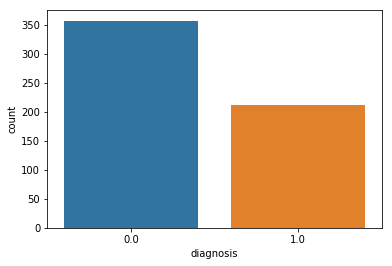

In [57]:
sns.countplot(data['diagnosis'],label="Count")

## Predictive Models
#### Model Training

> **Prediction accuracy on original dataset without any processing on the features**

In [59]:
df = data
print(df.shape)
result = pd.DataFrame()
result['diagnosis'] = df.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(df.values, result.values, test_size = 0.2)      
svc = SVC()
svc.fit(x_train, y_train)                        
prediction = svc.predict(x_test)                 
print('\nACCURACY: ',metrics.accuracy_score(prediction,y_test))

(569, 31)

ACCURACY:  0.6666666666666666


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### Feature Selection using correlation analysis

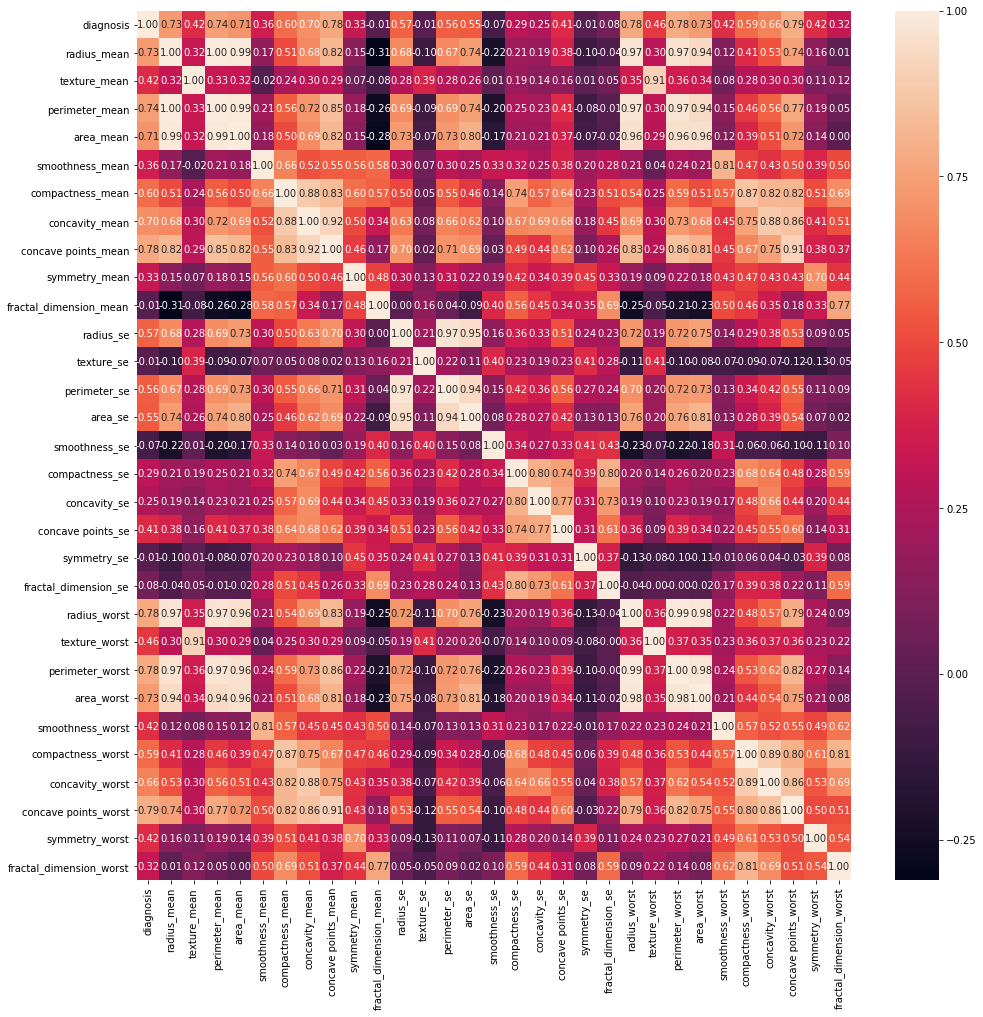

In [61]:
corr = data.corr()
corr.head()
plt.figure(figsize=(16,16))
sns.heatmap(corr, annot=True, fmt= '.2f')

### Feature Selection
##### Removing one of two features that have a correlation higher than 0.9

In [62]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
selected_columns = data.columns[columns]
selected_columns.shape

(21,)

In [63]:
data = data[selected_columns]
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Backward Elimination
##### Feature Selection using p-value

In [65]:
selected_columns = selected_columns[1:].values    
selected_columns

array(['radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst'], dtype=object)

In [66]:
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    #print(x[:,j].mean())
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    print(regressor_OLS.summary())
    return x, columns

In [67]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     213.6
Date:                Mon, 10 Feb 2020   Prob (F-statistic):          2.22e-206
Time:                        06:26:08   Log-Likelihood:                -16.959
No. Observations:                 569   AIC:                             59.92
Df Residuals:                     556   BIC:                             116.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0146      0.005      3.236      0.0

In [68]:
selected_columns

array(['radius_mean', 'texture_mean', 'concavity_mean',
       'fractal_dimension_mean', 'radius_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

In [69]:
result = pd.DataFrame()
result['diagnosis'] = data.iloc[:,0]

In [70]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)
data

,radius_mean,texture_mean,concavity_mean,fractal_dimension_mean,radius_se,compactness_se,concavity_se,concave points_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.990,10.38,0.300100,0.07871,1.0950,0.049040,0.053730,0.015870,0.006193,0.16220,0.71190,0.4601,0.11890
1,20.570,17.77,0.086900,0.05667,0.5435,0.013080,0.018600,0.013400,0.003532,0.12380,0.24160,0.2750,0.08902
2,19.690,21.25,0.197400,0.05999,0.7456,0.040060,0.038320,0.020580,0.004571,0.14440,0.45040,0.3613,0.08758
3,11.420,20.38,0.241400,0.09744,0.4956,0.074580,0.056610,0.018670,0.009208,0.20980,0.68690,0.6638,0.17300
4,20.290,14.34,0.198000,0.05883,0.7572,0.024610,0.056880,0.018850,0.005115,0.13740,0.40000,0.2364,0.07678
5,12.450,15.70,0.157800,0.07613,0.3345,0.033450,0.036720,0.011370,0.005082,0.17910,0.53550,0.3985,0.12440
6,18.250,19.98,0.112700,0.05742,0.4467,0.013820,0.022540,0.010390,0.002179,0.14420,0.37840,0.3063,0.08368
7,13.710,20.83,0.093660,0.07451,0.5835,0.030290,0.024880,0.014480,0.005412,0.16540,0.26780,0.3196,0.11510
8,13.000,21.82,0.185900,0.07389,0.3063,0.035020,0.035530,0.012260,0.003749,0.17030,0.53900,0.4378,0.10720
9,12.460,24.04,0.227300,0.08243,0.2976,0.072170,0.077430,0.014320,0.010080,0.18530,1.10500,0.4366,0.20750


In [71]:
data.columns

Index(['radius_mean', 'texture_mean', 'concavity_mean',
       'fractal_dimension_mean', 'radius_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'fractal_dimension_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [75]:
x_train

array([[14.25   , 22.15   ,  0.2135 , ...,  0.6922 ,  0.2844 ,  0.1132 ],
       [ 6.981  , 13.43   ,  0.     , ...,  0.     ,  0.2932 ,  0.09382],
       [19.21   , 18.57   ,  0.1323 , ...,  0.3879 ,  0.3537 ,  0.08294],
       ...,
       [13.85   , 15.18   ,  0.04479, ...,  0.1456 ,  0.2955 ,  0.06912],
       [12.77   , 22.47   ,  0.04711, ...,  0.2177 ,  0.2829 ,  0.08067],
       [12.89   , 13.12   ,  0.0226 , ...,  0.1186 ,  0.2309 ,  0.06915]])

In [76]:
data.head(1)

,radius_mean,texture_mean,concavity_mean,fractal_dimension_mean,radius_se,compactness_se,concavity_se,concave points_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.3001,0.07871,1.095,0.04904,0.05373,0.01587,0.006193,0.1622,0.7119,0.4601,0.1189


In [33]:
l1 = [17.99,10.38,0.3001,0.07871,1.095,0.04904,0.05373,0.01587,0.006193,0.1622,0.71190,0.4601,0.1189]

In [79]:
l1

,radius_mean,texture_mean,concavity_mean,fractal_dimension_mean,radius_se,compactness_se,concavity_se,concave points_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.3001,0.07871,1.095,0.04904,0.05373,0.01587,0.006193,0.1622,0.7119,0.4601,0.1189


#### Model Build After Feature Selection
####  Model Building and Evaluation

In [ ]:
#SVM
svc = SVC()              
svc.fit(x_train, y_train)

In [ ]:
#Prediction
prediction = svc.predict(x_test)

In [ ]:
#Evaluating model
cm = confusion_matrix(y_test, prediction)
print('\nCONFUSION MATRIX:\n', cm)
print('\nACCURACY: ',metrics.accuracy_score(prediction,y_test))

In [ ]:
#RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

In [ ]:
#Prediction
prediction = model.predict(x_test)

In [ ]:
#Evaluating model
cm = confusion_matrix(y_test, prediction)
print('\nCONFUSION MATRIX:\n', cm)
print('\nACCURACY: ',metrics.accuracy_score(prediction,y_test))

In [ ]:
#CROSS VALIDATION
scores = cross_val_score(model, data.values, result.values, cv=10)
print("Cross Validaton score(avg): {:.6f}" .format(scores.mean()))

##### Model Persistance

In [29]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [38]:
df = data.head(1)

In [39]:
df

,radius_mean,texture_mean,concavity_mean,fractal_dimension_mean,radius_se,compactness_se,concavity_se,concave points_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.3001,0.07871,1.095,0.04904,0.05373,0.01587,0.006193,0.1622,0.7119,0.4601,0.1189


In [36]:
loaded_model = pickle.load(open('model.pkl', 'rb'))

In [46]:
y_pred = int(loaded_model.predict(df)[0])

In [47]:
y_pred

1

## END